In [1]:
# Imports
import pandas as pd

Various Analysis on the Metadata extracted from BSaber and Beatsaver

In [2]:
meta_df = pd.read_csv("./Data/Metadata.csv")
meta_df.head()

,Unnamed: 0,key,level_author_name,song_name,song_sub_name,bpm,upvotes,downvotes,plays,upload_date,downloads,download_url,overall_rating,fun_factor,rhythm,flow,pattern_quality,readability,level_quality
0,0,579f,wh4t,Without Warning,NaN,200.000000,0,0,0,2019-07-18T04:03:55.017Z,23,/api/download/key/579f,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,579e,CyanSnow,This is (not) the end,NaN,128.018005,1,0,0,2019-07-18T02:48:39.996Z,55,/api/download/key/579e,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,579d,nolan121405,Good Morning World,NaN,191.000000,0,0,0,2019-07-18T02:42:25.409Z,71,/api/download/key/579d,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,579b,Keiichi Okabe,Three's Song,NaN,230.000000,0,0,0,2019-07-18T01:37:45.214Z,39,/api/download/key/579b,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,579a,Kikis,Gee,NaN,200.000000,0,0,0,2019-07-18T01:13:44.990Z,117,/api/download/key/579a,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# All songs with no upvotes
print("Number songs with no up or downvotes: " + str(meta_df[(meta_df.upvotes == 0) & (meta_df.downvotes == 0)]["key"].count()))
print("Number songs with at least one up or downvote: " + str(meta_df[(meta_df.upvotes != 0) | (meta_df.downvotes != 0)]["key"].count()))
print("Number songs with a rating score: " + str(meta_df[meta_df.overall_rating != 0]["key"].count()))
print("Number songs with no rating score: " + str(meta_df[meta_df.overall_rating == 0]["key"].count()))

Number songs with no up or downvotes: 211
Number songs with at least one up or downvote: 14549
Number songs with a rating score: 5390
Number songs with no rating score: 9370


In [16]:
meta_df["adjusted_votes"] = meta_df["upvotes"] - meta_df["downvotes"]
meta_df.head()

,Unnamed: 0,key,level_author_name,song_name,song_sub_name,bpm,upvotes,downvotes,plays,upload_date,downloads,download_url,overall_rating,fun_factor,rhythm,flow,pattern_quality,readability,level_quality,adjusted_votes
0,0,579f,wh4t,Without Warning,NaN,200.000000,0,0,0,2019-07-18T04:03:55.017Z,23,/api/download/key/579f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,579e,CyanSnow,This is (not) the end,NaN,128.018005,1,0,0,2019-07-18T02:48:39.996Z,55,/api/download/key/579e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,579d,nolan121405,Good Morning World,NaN,191.000000,0,0,0,2019-07-18T02:42:25.409Z,71,/api/download/key/579d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,579b,Keiichi Okabe,Three's Song,NaN,230.000000,0,0,0,2019-07-18T01:37:45.214Z,39,/api/download/key/579b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,579a,Kikis,Gee,NaN,200.000000,0,0,0,2019-07-18T01:13:44.990Z,117,/api/download/key/579a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Part 2 - Spectrogram analysis and individual song download

In [25]:
import SongDownloader
import Spectrogram
import SongConvert
import logging

test_key = "560"
logging.basicConfig(level=logging.INFO)

INFO:root:Path for 560 didn't already exist. Creating


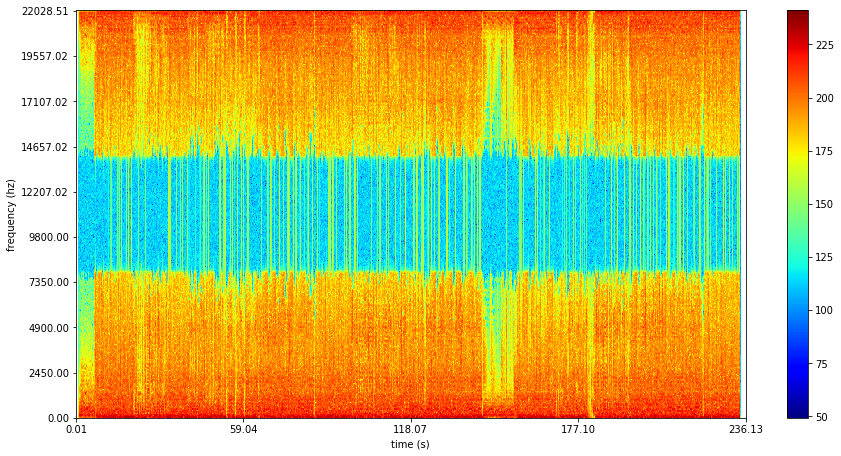

array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf]])

<Figure size 432x288 with 0 Axes>

In [26]:
# Download song
SongDownloader.download_song(test_key)

old_file_name = "./Data/{}/song.egg".format(test_key)
SongConvert.convert_song_egg_to_wav(old_file_name)
Spectrogram.plotstft(old_file_name.replace(".egg", ".wav")) 